In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns = train_df.columns.str.replace('rainfall_train.', '', regex=False)
test_df.columns = test_df.columns.str.replace('rainfall_test.', '', regex=False)

columns = ['stn4contest','ef_month','dh','v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval']
train_df = train_df[columns]
train_df = pd.get_dummies(train_df,columns = ['stn4contest','ef_month'])

train_df = train_df[train_df['vv']>=0]

train_df['v01'] = train_df['v01']/100
train_df['v02'] = train_df['v02']/100
train_df['v03'] = train_df['v03']/100
train_df['v04'] = train_df['v04']/100
train_df['v05'] = train_df['v05']/100
train_df['v06'] = train_df['v06']/100
train_df['v07'] = train_df['v07']/100
train_df['v08'] = train_df['v08']/100
train_df['v09'] = train_df['v09']/100


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score


X = train_df.drop(columns=['class_interval','vv'])
y = train_df['class_interval']

# Identify numerical features and dummy variables
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
dummy_variables = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='class')

# Standard scaling for numerical features only
#scaler = StandardScaler()
#X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])

# Drop specific columns if needed (example: drop 'feature1' and 'dummy_var')
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [3]:
y_resampled

0           0
1           0
2           0
3           0
4           0
           ..
12233145    9
12233146    9
12233147    9
12233148    9
12233149    9
Name: class, Length: 12233150, dtype: int64

In [4]:
X_resampled[y_resampled==9].describe()

,dh,v01,v02,v03,v04,v05,v06,v07,v08,v09
count,1.223315e+06,1.223315e+06,1.223315e+06,1.223315e+06,1.223315e+06,1.223315e+06,1.223315e+06,1.223315e+06,1.223315e+06,1.223315e+06
mean,1.225291e+02,7.475435e-01,6.952985e-01,6.077827e-01,5.275543e-01,4.376131e-01,2.920925e-01,1.618986e-01,5.503887e-02,2.299534e-02
std,6.917277e+01,2.207922e-01,2.411462e-01,2.670020e-01,2.825889e-01,2.905863e-01,2.729046e-01,2.159716e-01,1.249512e-01,7.206304e-02
min,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.300000e+01,5.967939e-01,5.181695e-01,3.950689e-01,2.962742e-01,2.007891e-01,8.901162e-02,2.828720e-02,0.000000e+00,0.000000e+00
50%,1.230000e+02,7.841622e-01,7.139725e-01,5.890259e-01,4.779281e-01,3.595807e-01,1.896221e-01,7.339074e-02,1.169149e-02,0.000000e+00
75%,1.830000e+02,9.526209e-01,9.239960e-01,8.565390e-01,7.700000e-01,6.511737e-01,4.190205e-01,1.918439e-01,4.125124e-02,1.384059e-02
max,2.400000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e-01


In [5]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

XGboost = XGBClassifier(random_state=42)
XGboost.fit(X_train,y_train)



KeyboardInterrupt: 

In [ ]:
# Make predictions
y_pred = XGboost.predict(X_test)
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred,  average = 'weighted')

# Calculate the F1 scor score
F1 = f1_score(y_test, y_pred, average = 'weighted')

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average = 'weighted')

accuracy: 0.4127849327442237
F1: 0.39112225395653644


<Axes: >

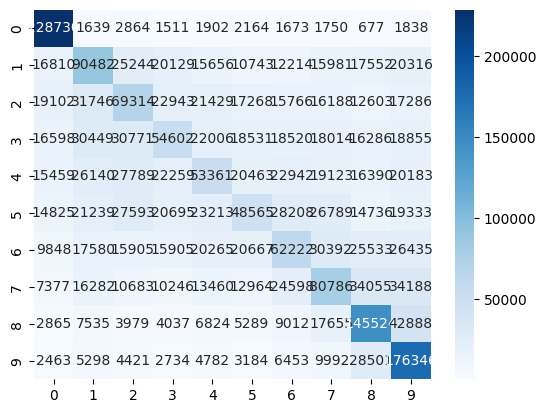

In [ ]:
import seaborn as sns
print('accuracy:',accuracy)
print('F1:',F1)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

0이 아닌 class 분류

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns = train_df.columns.str.replace('rainfall_train.', '', regex=False)
test_df.columns = test_df.columns.str.replace('rainfall_test.', '', regex=False)

columns = ['stn4contest','ef_month','dh','v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval']
train_df = train_df[columns]
train_df = pd.get_dummies(train_df,columns = ['stn4contest','ef_month'])

rain_df = train_df[train_df['vv']>0]

rain_df['v01'] = rain_df['v01']/100
rain_df['v02'] = rain_df['v02']/100
rain_df['v03'] = rain_df['v03']/100
rain_df['v04'] = rain_df['v04']/100
rain_df['v05'] = rain_df['v05']/100
rain_df['v06'] = rain_df['v06']/100
rain_df['v07'] = rain_df['v07']/100
rain_df['v08'] = rain_df['v08']/100
rain_df['v09'] = rain_df['v09']/100

C:\Users\dochy\AppData\Local\Temp\ipykernel_2504\229753650.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df['v01'] = rain_df['v01']/100
C:\Users\dochy\AppData\Local\Temp\ipykernel_2504\229753650.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df['v02'] = rain_df['v02']/100
C:\Users\dochy\AppData\Local\Temp\ipykernel_2504\229753650.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
X = rain_df.drop(columns=['class_interval','vv'])
y = rain_df['class_interval']

# Identify numerical features and dummy variables
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
dummy_variables = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='class')

# Standard scaling for numerical features only
#scaler = StandardScaler()
#X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])

# Drop specific columns if needed (example: drop 'feature1' and 'dummy_var')
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

accuracy: 0.3329397716447748
F1: 0.3225632253135603


<Axes: >

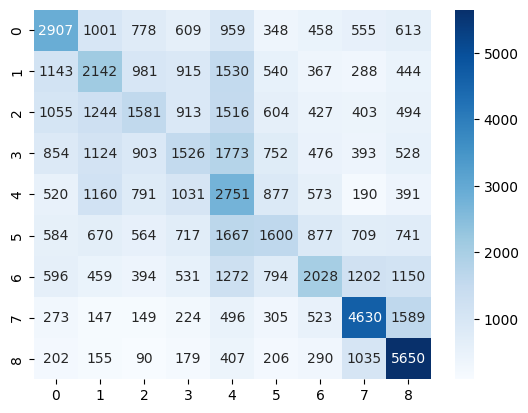

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

XGboost = XGBClassifier(random_state=42)
XGboost.fit(X_train,y_train)

# Make predictions
y_pred = XGboost.predict(X_test)
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate the recall score
recall = recall_score(y_test, y_pred,  average = 'weighted')

# Calculate the F1 scor score
F1 = f1_score(y_test, y_pred, average = 'weighted')

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average = 'weighted')

import seaborn as sns
print('accuracy:',accuracy)
print('F1:',F1)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

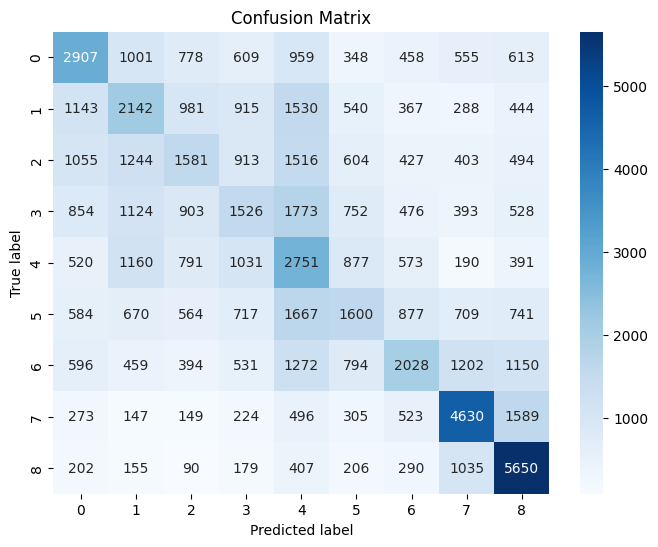

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
len(y_resampled)

372663

Regression

LSTM => SMOTE

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns = train_df.columns.str.replace('rainfall_train.', '', regex=False)
test_df.columns = test_df.columns.str.replace('rainfall_test.', '', regex=False)

columns = ['stn4contest','ef_month','dh','v01', 'v02', 'v03','v04', 'v05', 'v06', 'v07', 'v08', 'v09', 'vv', 'class_interval']
train_df = train_df[columns]
train_df = pd.get_dummies(train_df,columns = ['stn4contest','ef_month'])

rain_df = train_df[train_df['vv']>0]

rain_df['v01'] = rain_df['v01']/100
rain_df['v02'] = rain_df['v02']/100
rain_df['v03'] = rain_df['v03']/100
rain_df['v04'] = rain_df['v04']/100
rain_df['v05'] = rain_df['v05']/100
rain_df['v06'] = rain_df['v06']/100
rain_df['v07'] = rain_df['v07']/100
rain_df['v08'] = rain_df['v08']/100
rain_df['v09'] = rain_df['v09']/100

C:\Users\dochy\AppData\Local\Temp\ipykernel_27348\229753650.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df['v01'] = rain_df['v01']/100
C:\Users\dochy\AppData\Local\Temp\ipykernel_27348\229753650.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_df['v02'] = rain_df['v02']/100
C:\Users\dochy\AppData\Local\Temp\ipykernel_27348\229753650.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [7]:
import pandas as pd
import numpy as np
data_df = pd.read_csv('sequential.csv')
columns_drop = ['label','vv','Unnamed: 0']
data_df = data_df.drop(columns = columns_drop)
split_datasets = {station: data_df[data_df['stn4contest'] == station] for station in data_df['stn4contest'].unique()}

In [8]:
grouped_counts = data_df.groupby(['stn4contest','ef_year', 'ef_month', 'ef_day', 'ef_hour']).size()

# Reset index to turn the Series into a DataFrame (if desired)
grouped_counts = grouped_counts.reset_index(name='count')

# Display the result
print(grouped_counts['count'])

0        1
1        1
2        1
3        1
4        2
        ..
77518    2
77519    1
77520    1
77521    1
77522    1
Name: count, Length: 77523, dtype: int64


In [9]:
start_idx = 0
xs = []
ys = []

for i in grouped_counts['count']:
    seq_length = i
    end_idx = start_idx + seq_length
    if end_idx <= len(data_df):
        x = data_df.iloc[start_idx:end_idx].drop(columns = ['class_interval','stn4contest','ef_year'], axis=1).values
        y = data_df.iloc[end_idx - 1]['class_interval']
        xs.append(x)
        ys.append(y)
    start_idx = end_idx

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

def zero_padding(xs):
    # Find the length of the longest sequence
    max_seq_length = max(len(seq) for seq in xs)
    # Pad sequences with zeros to make them all the same length
    padded_sequences = pad_sequences(xs, maxlen=max_seq_length, dtype='float32', padding='post')
    return padded_sequences

In [12]:
xs = np.array(zero_padding(xs))
ys = np.array(ys)

In [13]:
xs = np.array(xs)
ys = np.array(ys)
# Reshape xs to 2D array for SMOTE
num_samples, seq_length, num_features = xs.shape
xs_reshaped = xs.reshape(num_samples, seq_length * num_features)

# Apply SMOTE
smote = SMOTE()
xs_resampled, ys_resampled = smote.fit_resample(xs_reshaped, ys)

# Reshape back to 3D array for LSTM
xs_resampled = xs_resampled.reshape(-1, seq_length, num_features)

# Verify shapes
print("Original shape:", xs.shape)
print("Resampled shape:", xs_resampled.shape)

Original shape: (77523, 20, 13)
Resampled shape: (655370, 20, 13)


In [16]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
x_train, x_test, y_train, y_test = train_test_split(xs_resampled, ys_resampled, test_size=0.2, random_state=42,shuffle = True)

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [18]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

c:\Users\dochy\anaconda3\envs\mushroom\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\dochy\anaconda3\envs\mushroom\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(20, 13)))
model.add(Dense(10, activation='softmax'))  # Output layer with 9 units for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/4
11469/11469 [==============================] - 88s 8ms/step - loss: 1.7472 - accuracy: 0.3191 - val_loss: 1.6473 - val_accuracy: 0.3551
Epoch 2/4
11469/11469 [==============================] - 83s 7ms/step - loss: 1.5906 - accuracy: 0.3846 - val_loss: 1.5263 - val_accuracy: 0.4140
Epoch 3/4
11469/11469 [==============================] - 80s 7ms/step - loss: 1.4799 - accuracy: 0.4339 - val_loss: 1.4253 - val_accuracy: 0.4523
Epoch 4/4
11469/11469 [==============================] - 84s 7ms/step - loss: 1.4183 - accuracy: 0.4603 - val_loss: 1.3946 - val_accuracy: 0.4705


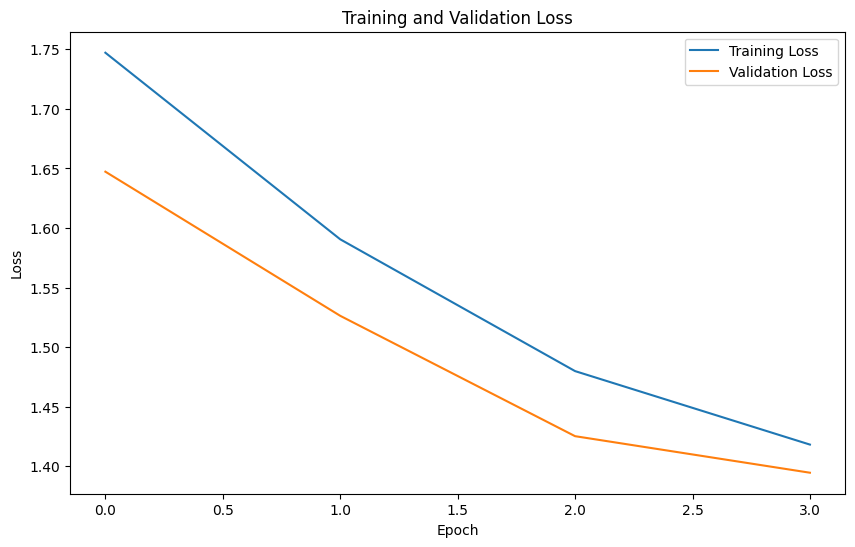

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

history = model.fit(x_train, y_train, epochs=4, batch_size=32, validation_split=0.3, verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
# Convert probabilities to binary class labels
# Calculate F1 score

4097/4097 [==============================] - 12s 3ms/step


In [ ]:
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
y_pred_class[0:50]

array([5, 2, 8, 6, 8, 0, 0, 0, 4, 9, 4, 0, 2, 9, 2, 1, 9, 2, 1, 3, 5, 1,
       2, 0, 1, 3, 3, 4, 8, 1, 1, 8, 8, 2, 8, 0, 3, 1, 3, 8, 8, 5, 8, 7,
       7, 8, 5, 2, 4, 7], dtype=int64)

In [ ]:
y_test_class[0:50]

array([2, 3, 8, 6, 8, 0, 0, 0, 2, 9, 6, 0, 3, 9, 1, 1, 9, 1, 1, 2, 5, 1,
       2, 0, 0, 1, 7, 5, 6, 3, 2, 8, 8, 1, 8, 4, 0, 3, 5, 2, 8, 2, 8, 7,
       7, 6, 5, 2, 2, 6], dtype=int64)

In [ ]:
accuracy = accuracy_score(y_test_class, y_pred_class)

# Calculate F1 score
f1 = f1_score(y_test_class, y_pred_class, average='macro')

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Confusion Matrix:
[[ 30  95  24  43  23   5   3   0   0]
 [ 28 154  41  86  45   9   6   0   0]
 [ 21 116  28  86  93  12   2   0   0]
 [ 17  80  26  94 116  20  11   0   1]
 [  5  61  23  97 183  45  23   0   5]
 [  2  24  13  32 114  60  37   1   4]
 [  0  17   5  21  58  44  41   1  13]
 [  3   9   1   6  23  12  16   0  10]
 [  1   5   1  10  11  19  10   0  17]]
Accuracy: 0.46334131864442984
F1 Score: 0.4538229749990208


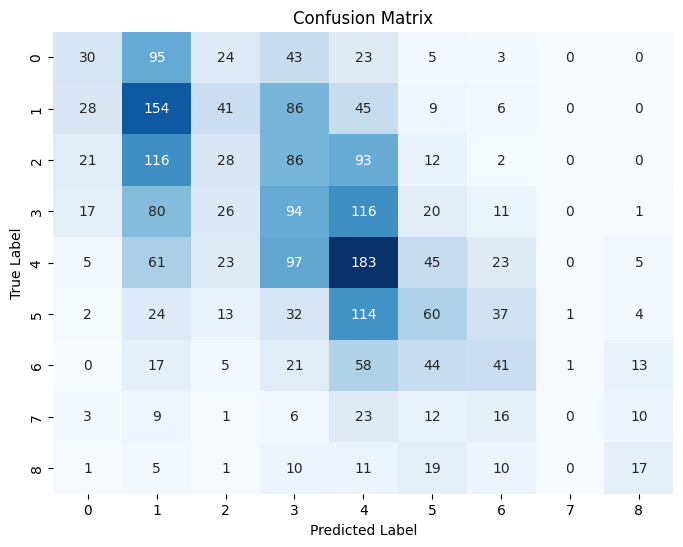

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()